# The Sparks Foundation:Graduate Rotational Internship Program

# Data science and Bussiness Analytics Intern

# Task 2 - Prediciton using Unsupervised ML

# NAME - Vikash Jayprakash Chaturvedi

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\Vikash chaturvedi\\Downloads\\Iris.csv")

In [3]:
data.head() #first five record of dataset data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() #last five record dataset data

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isnull().sum() #checking number of null value present in dataset data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.dtypes  #checking datatype of each column in dataframe data

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
data.shape #checking number of rows and column present in dataset data

(150, 5)

In [8]:
data.info() #checking information about the  data oresent in dataframe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe() #used to generate descriptive statistics of a DataFrame data.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#selects columns from the DataFrame data that have data types of either float64 or int64.
numeric_features = data.select_dtypes(include=['float64', 'int64'])

In [11]:
print(numeric_features.dtypes) #Display the data types of each column within the numeric_features 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object


In [12]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [13]:
features = data.iloc[:, 1:5] #This operation allows you to select specific columns from a DataFrame based on their positional indices

In [14]:
# creates an instance of the StandardScaler class from the scikit-learn library, which is commonly used for preprocessing data in machine learning tasks.
scaler = StandardScaler()

In [15]:
scaled_features = scaler.fit_transform(numeric_features)

In [16]:
#wcss stands for "Within-Cluster Sum of Squares.
#the context of clustering algorithms like K-means, WCSS is a metric used to evaluate the goodness of fit or the compactness of the clusters formed
wcss = []

In [17]:
# Finding the optimum number of clusters for k-means classification
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

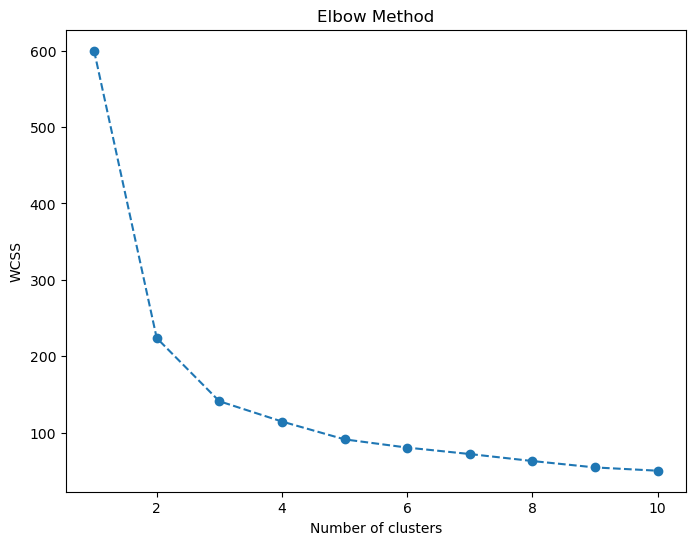

In [18]:
# we will used elbow method to find optimum number of cluster in k-mean
#here i plotting the result into line graph
#From the below elbow curve we can observed that three cluster will be optimum number of cluster


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
X = data.iloc[:,:-1].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

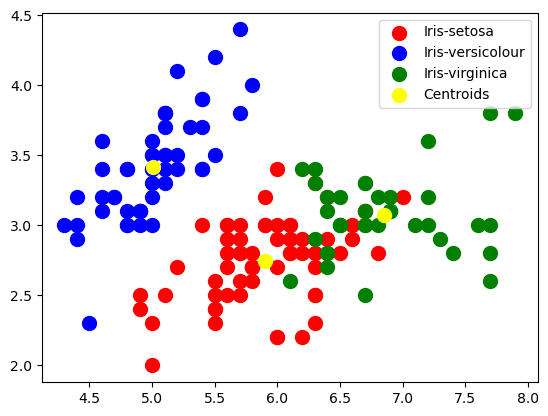

In [25]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

#As we can see the data points are divided into three clusters of different categories. 
#The yellow points are the centroids of each of the clusters.